- 1 深度系统deepin linux环境下运行
- 2 未能解决绘图饼图中展示的分块内容的中文乱码问题

In [2]:
road = r'/media/apple/A29E38759E384457/Study/data/20200126-jinshuju-wuhanfeiyan/wuhanfeiyan_202001261715.csv'
road

'/media/apple/A29E38759E384457/Study/data/20200126-jinshuju-wuhanfeiyan/wuhanfeiyan_202001261715.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(road)
df.head(2)

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
0,2020-01-26 11:59:57,480,18~25,男,大学本科,大学生,湖北省宜昌市,病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，公众号，微信群，微信朋友圈，微博，电视新闻,中立，不做判断,已有权威机构证实存在短缺,口罩，酒精，体温计,已储备30天以上的物资
1,2020-01-26 03:48:37,203,26~30,女,高中/中专/技校,个体经营户,福建省莆田市,病毒会进化，并且致死性越来越强，病毒对老年人有严重的威胁，感染病毒后会立即出现咳嗽、发烧的症...,有中型聚会安排（5～10人）,父母已取消所有聚会安排,微信好友，公众号，微信群，微博，微信朋友圈，抖音，电视新闻,NaN,没有确凿信息，不断定,口罩，体温计，酒精,未储备


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 15 columns):
time                          498 non-null object
id                            498 non-null int64
age                           498 non-null object
sex                           498 non-null object
education                     498 non-null object
job                           498 non-null object
location                      497 non-null object
correct_understanding         496 non-null object
my_party                      498 non-null object
parent_party                  498 non-null object
channel_find_info             498 non-null object
control feelings              475 non-null object
hospital_resource_shortage    498 non-null object
family_medical_resources      496 non-null object
family_living_resources       498 non-null object
dtypes: int64(1), object(14)
memory usage: 58.5+ KB


In [6]:
# 发现mysql重命名有个错误
# df1.rename(columns={'c':'D'},inplace=True) 
df.rename(columns={'control feelings':'control_feelings'},inplace=True)
df.columns

Index(['time', 'id', 'age', 'sex', 'education', 'job', 'location',
       'correct_understanding', 'my_party', 'parent_party',
       'channel_find_info', 'control_feelings', 'hospital_resource_shortage',
       'family_medical_resources', 'family_living_resources'],
      dtype='object')

In [7]:
data = df.copy()
data.head(2)

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
0,2020-01-26 11:59:57,480,18~25,男,大学本科,大学生,湖北省宜昌市,病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，公众号，微信群，微信朋友圈，微博，电视新闻,中立，不做判断,已有权威机构证实存在短缺,口罩，酒精，体温计,已储备30天以上的物资
1,2020-01-26 03:48:37,203,26~30,女,高中/中专/技校,个体经营户,福建省莆田市,病毒会进化，并且致死性越来越强，病毒对老年人有严重的威胁，感染病毒后会立即出现咳嗽、发烧的症...,有中型聚会安排（5～10人）,父母已取消所有聚会安排,微信好友，公众号，微信群，微博，微信朋友圈，抖音，电视新闻,NaN,没有确凿信息，不断定,口罩，体温计，酒精,未储备


In [8]:
df[df.location.isnull()]
# 查询空值结果为布尔值false-true，再代入到df中，则可找到此列为true值的

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
438,2020-01-25 23:24:09,36,26~30,不想透露,保密,其他,NaN,病毒对老年人有严重的威胁,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，微信群，微信朋友圈，微博，电视新闻,较乐观，短期会好转,没有确凿信息，不断定,口罩,已储备7天内的物资


In [9]:
# 用常见的　湖北省武汉市　代替location空值
df[df.location.isnull()]['location'] = '湖北省武汉市'
df[df.location.isnull()]
# A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead

/home/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
438,2020-01-25 23:24:09,36,26~30,不想透露,保密,其他,NaN,病毒对老年人有严重的威胁,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，微信群，微信朋友圈，微博，电视新闻,较乐观，短期会好转,没有确凿信息，不断定,口罩,已储备7天内的物资


In [45]:
df[df.location.isnull()].location.fillna('湖北省武汉市',inplace=True)
# 输出警告不支持填充　
# A value is trying to be set on a copy of a slice from a DataFrame

/home/apple/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
df.location[438:440, ]

438     NaN
439    海外其它
Name: location, dtype: object

In [12]:
# df['近期销量']=df['近期销量'].replace(np.nan,'0').astype(int)
df['location'] = df['location'].replace(np.nan,'湖北省武汉市')

In [13]:
df.location[438:440, ]

438    湖北省武汉市
439      海外其它
Name: location, dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 15 columns):
time                          498 non-null object
id                            498 non-null int64
age                           498 non-null object
sex                           498 non-null object
education                     498 non-null object
job                           498 non-null object
location                      498 non-null object
correct_understanding         496 non-null object
my_party                      498 non-null object
parent_party                  498 non-null object
channel_find_info             498 non-null object
control_feelings              475 non-null object
hospital_resource_shortage    498 non-null object
family_medical_resources      496 non-null object
family_living_resources       498 non-null object
dtypes: int64(1), object(14)
memory usage: 58.5+ KB


In [15]:
df[df['correct_understanding'].isnull()]

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
56,2020-01-26 09:29:18,341,18~25,男,大学本科,上班族/创业者,湖北省荆州市,NaN,已取消所有聚会安排,父母已取消所有聚会安排,微博，公众号，微信群，微信好友,较乐观，短期会好转,已有权威机构证实存在短缺,口罩,已储备7～30天的物资
382,2020-01-26 00:02:57,121,18~25,不想透露,保密,大学生,广东省佛山市,NaN,已取消所有聚会安排,父母已取消所有聚会安排,微博，抖音，电视新闻，微信朋友圈，微信群，微信好友，其他,中立，不做判断,没有确凿信息，不断定,口罩，酒精,已储备7天内的物资


In [16]:
df['correct_understanding'].value_counts(ascending=False)
# 用值出现最多的string来替换空值

病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强            86
病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒                            83
病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强                          33
病毒对老年人有严重的威胁                                          21
病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒致死性很强，病毒会进化，并且致死性越来越强    19
                                                      ..
目前抗病毒药物已经成功研发                                          1
没有生病的人，不会传染病毒，病毒会进化，并且致死性越来越强                          1
感染病毒后会立即出现咳嗽、发烧的症状                                     1
病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强，感染病毒后会立即出现咳嗽、发烧的症状        1
病毒对老年人有严重的威胁，家里放白醋可以预防病毒                               1
Name: correct_understanding, Length: 123, dtype: int64

In [17]:
df['correct_understanding'] = df['correct_understanding'].replace(np.nan,'病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强')

In [18]:
df.correct_understanding[56:57, ]

56    病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强
Name: correct_understanding, dtype: object

In [19]:
df.correct_understanding[382:383, ]

382    病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强
Name: correct_understanding, dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 15 columns):
time                          498 non-null object
id                            498 non-null int64
age                           498 non-null object
sex                           498 non-null object
education                     498 non-null object
job                           498 non-null object
location                      498 non-null object
correct_understanding         498 non-null object
my_party                      498 non-null object
parent_party                  498 non-null object
channel_find_info             498 non-null object
control_feelings              475 non-null object
hospital_resource_shortage    498 non-null object
family_medical_resources      496 non-null object
family_living_resources       498 non-null object
dtypes: int64(1), object(14)
memory usage: 58.5+ KB


In [21]:
df.control_feelings.value_counts()

中立，不做判断              193
较悲观，短期可能会更严重         144
较乐观，短期会好转             80
非常悲观，会更严重，甚至进一步爆发     42
非常乐观，很快会好转            16
Name: control_feelings, dtype: int64

In [ ]:
df[df.control_feelings.isnull()]
# Nan为空值，用中立不作判断最好，且为最多的值
# time	id	age	sex	education	job	location	correct_understanding	my_party	parent_party	channel_find_info	control_feelings	hospital_resource_shortage	family_medical_resources	family_living_resources
# 1	2020-01-26 03:48:37	203	26~30	女	高中/中专/技校	个体经营户	福建省莆田市	病毒会进化，并且致死性越来越强，病毒对老年人有严重的威胁，感染病毒后会立即出现咳嗽、发烧的症...	有中型聚会安排（5～10人）	父母已取消所有聚会安排	微信好友，公众号，微信群，微博，微信朋友圈，抖音，电视新闻	NaN	没有确凿信息，不断定	口罩，体温计，酒精	未储备
# 314	2020-01-25 23:36:22	60	26~30	女	大学本科	上班族/创业者	安徽省宣城市	病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒致死性很强，病毒会进化，并且致死性...	有中型聚会安排（5～10人）	父母已取消所有聚会安排	微信好友，公众号，微信群，微信朋友圈，微博，抖音，电视新闻	NaN	没有确凿信息，不断定	保健品	未储备

In [23]:
df['control_feelings'] = df['control_feelings'].replace(np.nan,'中立，不做判断')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 15 columns):
time                          498 non-null object
id                            498 non-null int64
age                           498 non-null object
sex                           498 non-null object
education                     498 non-null object
job                           498 non-null object
location                      498 non-null object
correct_understanding         498 non-null object
my_party                      498 non-null object
parent_party                  498 non-null object
channel_find_info             498 non-null object
control_feelings              498 non-null object
hospital_resource_shortage    498 non-null object
family_medical_resources      496 non-null object
family_living_resources       498 non-null object
dtypes: int64(1), object(14)
memory usage: 58.5+ KB


In [25]:
df[df.family_medical_resources.isnull()]

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
343,2020-01-25 23:14:07,5,18~25,男,大学本科,大学生,安徽省宿州市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒,有中型聚会安排（5～10人）,有聚会安排，父母会参与,电视新闻，其他，微博，微信朋友圈,中立，不做判断,没有确凿信息，不断定,NaN,已储备30天以上的物资
471,2020-01-25 23:22:11,30,18~25,女,大学本科,大学生,山西省大同市,病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强，没有生病的人，不会传染病毒,有中型聚会安排（5～10人）,父母已取消所有聚会安排,微博，抖音，电视新闻，微信朋友圈，微信群，微信好友,中立，不做判断,没有确凿信息，不断定,NaN,已储备7天内的物资


In [26]:
df.family_medical_resources.value_counts()

口罩                         138
口罩，体温计                      78
口罩，酒精，体温计                   49
口罩，酒精                       34
体温计                         24
                          ... 
口罩，酒精，体温计，抗生素，抗病毒药物，保健品      1
体温计，口罩，酒精，抗病毒药物              1
口罩，血氧仪                       1
口罩，护目镜                       1
体温计，酒精，抗生素                   1
Name: family_medical_resources, Length: 80, dtype: int64

In [27]:
df['family_medical_resources'] = df['family_medical_resources'].replace(np.nan,'口罩')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 15 columns):
time                          498 non-null object
id                            498 non-null int64
age                           498 non-null object
sex                           498 non-null object
education                     498 non-null object
job                           498 non-null object
location                      498 non-null object
correct_understanding         498 non-null object
my_party                      498 non-null object
parent_party                  498 non-null object
channel_find_info             498 non-null object
control_feelings              498 non-null object
hospital_resource_shortage    498 non-null object
family_medical_resources      498 non-null object
family_living_resources       498 non-null object
dtypes: int64(1), object(14)
memory usage: 58.5+ KB


In [29]:
df.describe()

,id
count,498.000000
mean,248.295181
std,143.074896
min,1.000000
25%,125.250000
50%,247.500000
75%,371.750000
max,496.000000


In [30]:
df.head(2)

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
0,2020-01-26 11:59:57,480,18~25,男,大学本科,大学生,湖北省宜昌市,病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，公众号，微信群，微信朋友圈，微博，电视新闻,中立，不做判断,已有权威机构证实存在短缺,口罩，酒精，体温计,已储备30天以上的物资
1,2020-01-26 03:48:37,203,26~30,女,高中/中专/技校,个体经营户,福建省莆田市,病毒会进化，并且致死性越来越强，病毒对老年人有严重的威胁，感染病毒后会立即出现咳嗽、发烧的症...,有中型聚会安排（5～10人）,父母已取消所有聚会安排,微信好友，公众号，微信群，微博，微信朋友圈，抖音，电视新闻,中立，不做判断,没有确凿信息，不断定,口罩，体温计，酒精,未储备


In [31]:
df.age.value_counts()

18~25    283
26~30    125
31~40     55
41~50     16
18岁以下     11
51~60      7
60以上       1
Name: age, dtype: int64

In [32]:
df[df.sex == '女']['age'].value_counts()

18~25    179
26~30     65
31~40     34
41~50     10
18岁以下      8
51~60      3
60以上       1
Name: age, dtype: int64

In [33]:
df[df.sex == '男']['age'].value_counts()

18~25    93
26~30    54
31~40    20
41~50     5
51~60     4
18岁以下     2
Name: age, dtype: int64

In [34]:
df[df.sex == '女']['age'].value_counts().sort_values()

60以上       1
51~60      3
18岁以下      8
41~50     10
31~40     34
26~30     65
18~25    179
Name: age, dtype: int64

In [35]:
df[df.sex == '男']['age'].value_counts().sort_values()

18岁以下     2
51~60     4
41~50     5
31~40    20
26~30    54
18~25    93
Name: age, dtype: int64

In [36]:
df.sex.value_counts()

女       300
男       178
不想透露     20
Name: sex, dtype: int64

In [37]:
df[df.sex == '女']['age'].value_counts().index

Index(['18~25', '26~30', '31~40', '41~50', '18岁以下', '51~60', '60以上'], dtype='object')

In [38]:
df[df.sex == '女']['age'].value_counts().values

array([179,  65,  34,  10,   8,   3,   1])

In [39]:
age_woman = df[df.sex == '女']['age'].value_counts().values
age_woman

array([179,  65,  34,  10,   8,   3,   1])

In [40]:
age_man = df[df.sex == '男']['age'].value_counts().values
age_man

array([93, 54, 20,  5,  4,  2])

In [41]:
labels_woman = df[df.sex == '女']['age'].value_counts().index
labels_woman

Index(['18~25', '26~30', '31~40', '41~50', '18岁以下', '51~60', '60以上'], dtype='object')

In [42]:
type(labels_woman)

pandas.core.indexes.base.Index

In [43]:
labels_woman = list(labels_woman)

In [44]:
labels_woman[0]

'18~25'

In [45]:
labels_woman[4] = '<18'
labels_woman

['18~25', '26~30', '31~40', '41~50', '<18', '51~60', '60以上']

In [46]:
labels_woman[6] = '>60'
labels_woman

['18~25', '26~30', '31~40', '41~50', '<18', '51~60', '>60']

In [47]:
labels_man = list(df[df.sex == '男']['age'].value_counts().index)
labels_man

['18~25', '26~30', '31~40', '41~50', '51~60', '18岁以下']

In [48]:
labels_man[5] = '<18'
labels_man

['18~25', '26~30', '31~40', '41~50', '51~60', '<18']

In [49]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei-windows.ttf'] 
# 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False
# 步骤二（解决坐标轴负数的负号显示问题）

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


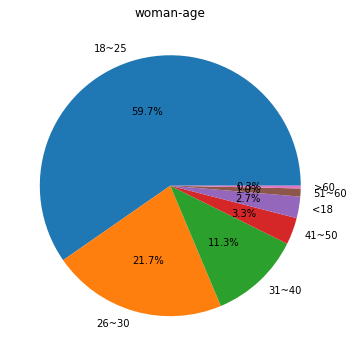

In [50]:
plt.figure(figsize=(10,6))
plt.pie(age_woman,labels=labels_woman,autopct='%1.1f%%')
plt.title("woman-age")
plt.show()

- 1 调研问卷传播渠道原因，存在男女性别用户在不同渠道看到导致调研男女不一样
- 2 从调研结果来看，女性年轻人0-30岁占据80%，男性30岁以内占据80%
- 3.1 20来岁非典40来岁肺炎，苍天放过谁追杀的微信截图段子
- 3.2 从调研数据来看，这部分人群男性总共占据5%,女性总共占据4.3%

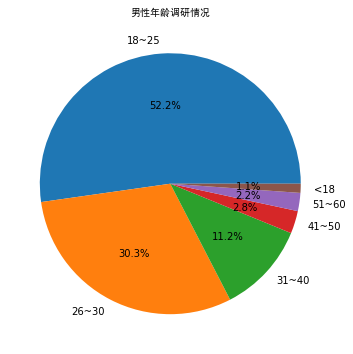

In [55]:
plt.rcParams['font.sans-serif'] = ['SimHei-windows.ttf']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8,6))
plt.pie(age_man,labels=labels_man,autopct='%1.1f%%')
plt.title("男性年龄调研情况",fontproperties=myfont)
plt.show()

In [56]:
# import matplotlib.pyplot as plt
import matplotlib
matplotlib.matplotlib_fname()

'/home/apple/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [57]:
ttfroad = '/usr/local/lib/python2.7/dist-packages/matplotlib/mpl-data/fonts/ttf/SimHei-windows.ttf'
ttfroad

'/usr/local/lib/python2.7/dist-packages/matplotlib/mpl-data/fonts/ttf/SimHei-windows.ttf'

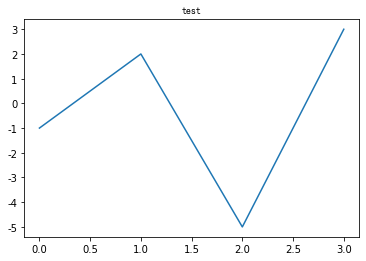

In [58]:
# https://www.linuxidc.com/Linux/2019-03/157632.htm
ttfroad = '/usr/local/lib/python2.7/dist-packages/matplotlib/mpl-data/fonts/ttf/SimHei-windows.ttf'
import matplotlib 
# matplotlib.use('qt4agg') 
from matplotlib.font_manager import * 
import matplotlib.pyplot as plt 
#定义自定义字体，文件名从1.b查看系统中文字体中来 
myfont = FontProperties(fname=ttfroad) 
#解决负号'-'显示为方块的问题 
matplotlib.rcParams['axes.unicode_minus']=False 
#notebook模式下绘图内嵌
%matplotlib inline  
plt.plot([-1,2,-5,3]) 
plt.title(u'test',fontproperties=myfont) 
plt.show()

In [59]:
df.head(2)

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
0,2020-01-26 11:59:57,480,18~25,男,大学本科,大学生,湖北省宜昌市,病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，公众号，微信群，微信朋友圈，微博，电视新闻,中立，不做判断,已有权威机构证实存在短缺,口罩，酒精，体温计,已储备30天以上的物资
1,2020-01-26 03:48:37,203,26~30,女,高中/中专/技校,个体经营户,福建省莆田市,病毒会进化，并且致死性越来越强，病毒对老年人有严重的威胁，感染病毒后会立即出现咳嗽、发烧的症...,有中型聚会安排（5～10人）,父母已取消所有聚会安排,微信好友，公众号，微信群，微博，微信朋友圈，抖音，电视新闻,中立，不做判断,没有确凿信息，不断定,口罩，体温计，酒精,未储备


In [60]:
channel1 = df.channel_find_info.value_counts()
channel1

微信好友，公众号，微信群，微信朋友圈，微博，电视新闻       19
微信好友，公众号，微信群，微信朋友圈，微博            13
微信好友，公众号，微信群，微信朋友圈，微博，抖音，电视新闻    12
微博，电视新闻                          11
微博                                9
                                 ..
微博，微信朋友圈，微信好友，公众号，电视新闻            1
微信群，微信朋友圈，微信好友，公众号，电视新闻           1
微信群，微信朋友圈，微博，抖音，电视新闻，其他，微信好友      1
微信朋友圈，微博，电视新闻，微信好友，公众号，微信群        1
微信好友，微信群，微博，电视新闻，抖音               1
Name: channel_find_info, Length: 315, dtype: int64

In [ ]:
channel2 = df.channel_find_info.values
channel2
# array(['微信好友，公众号，微信群，微信朋友圈，微博，电视新闻', '微信好友，公众号，微信群，微博，微信朋友圈，抖音，电视新闻',
#       '微信群，公众号，微信好友，微信朋友圈，微博', '公众号，微信群，微信朋友圈，微博，抖音，电视新闻，微信好友',
#       '微信好友，公众号，微信群，微信朋友圈，微博，抖音，电视新闻，其他', '微信群，公众号，微信朋友圈，电视新闻',

In [ ]:
channel3 = list(df.channel_find_info.values)
channel3
# ['微信好友，公众号，微信群，微信朋友圈，微博，电视新闻',
# '微信好友，公众号，微信群，微博，微信朋友圈，抖音，电视新闻',
# '微信群，公众号，微信好友，微信朋友圈，微博',
# '公众号，微信群，微信朋友圈，微博，抖音，电视新闻，微信好友',
# '微信好友，公众号，微信群，微信朋友圈，微博，抖音，电视新闻，其他',
# '微信群，公众号，微信朋友圈，电视新闻',

In [ ]:
from collections import Counter
result = Counter(channel3)
result
# channel3是列表内多个字符串组合，字符串内的数据没单独抽离
# Counter({'微信好友，公众号，微信群，微信朋友圈，微博，电视新闻': 19,
#         '微信好友，公众号，微信群，微博，微信朋友圈，抖音，电视新闻': 2,
#         '微信群，公众号，微信好友，微信朋友圈，微博': 1,

In [64]:
channel3[0]

'微信好友，公众号，微信群，微信朋友圈，微博，电视新闻'

In [65]:
channel3[0].split(',')

['微信好友，公众号，微信群，微信朋友圈，微博，电视新闻']

In [66]:
channel3[1].split(',')

['微信好友，公众号，微信群，微博，微信朋友圈，抖音，电视新闻']

In [67]:
channel3[1].split('，')[0]
# 单个字符内是中文，区分，split时得用中文的，逗号

'微信好友'

In [68]:
channel3[1].split('，')[1]

'公众号'

In [69]:
len(channel3[1].split('，'))

7

In [70]:
for itest in range(len(channel3[1].split('，'))):
    print(itest)
    print(channel3[1].split('，')[itest])

0
微信好友
1
公众号
2
微信群
3
微博
4
微信朋友圈
5
抖音
6
电视新闻


In [71]:
len(channel3)

498

In [72]:
print(range(len(channel3)))

range(0, 498)


In [ ]:
list_all_channel = []
for i in range(len(channel3)):
    for j in range(len(channel3[i].split('，'))):
    # print(i)
        list_all_channel.append(channel3[i].split('，')[j])
list_all_channel
# ['微信好友',
# '公众号',
# '微信群',
# '微信朋友圈',
# '微博',
# '电视新闻',
# '微信好友',

In [74]:
len(list_all_channel)

2178

In [75]:
type(list_all_channel)

list

In [76]:
from collections import Counter
result = Counter(list_all_channel)
result
# list_all_channel为列表数据，已经抽离出字符串成为单个字符
# 从调研获取信息传播渠道来看，大部分人群是通过微信来获取信息


Counter({'微信好友': 324,
         '公众号': 291,
         '微信群': 285,
         '微信朋友圈': 356,
         '微博': 366,
         '电视新闻': 312,
         '抖音': 122,
         '其他': 122})

In [77]:
dict(result)

{'微信好友': 324,
 '公众号': 291,
 '微信群': 285,
 '微信朋友圈': 356,
 '微博': 366,
 '电视新闻': 312,
 '抖音': 122,
 '其他': 122}

In [78]:
channel_keys = dict(result).keys()
channel_keys

dict_keys(['微信好友', '公众号', '微信群', '微信朋友圈', '微博', '电视新闻', '抖音', '其他'])

In [79]:
channel_values = dict(result).values()
channel_values

dict_values([324, 291, 285, 356, 366, 312, 122, 122])

In [80]:
list(result.items())[0][0]

'微信好友'

In [81]:
list(result.items())[0][1]

324

In [82]:
list(result.items())[0]

('微信好友', 324)

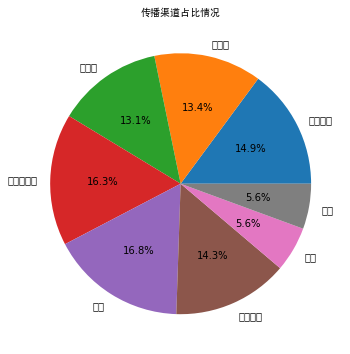

In [83]:
plt.rcParams['font.sans-serif'] = ['SimHei-windows.ttf']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8,6))
plt.pie(channel_values,labels=channel_keys,autopct='%1.1f%%')
plt.title("传播渠道占比情况",fontproperties=myfont)
plt.show()

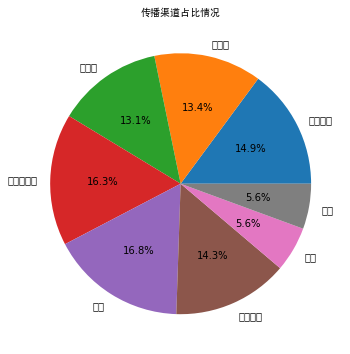

In [84]:
# https://www.linuxidc.com/Linux/2019-03/157632.htm
ttfroad = '/usr/local/lib/python2.7/dist-packages/matplotlib/mpl-data/fonts/ttf/SimHei-windows.ttf'
import matplotlib 
# matplotlib.use('qt4agg') 
from matplotlib.font_manager import * 
import matplotlib.pyplot as plt 
#定义自定义字体，文件名从1.b查看系统中文字体中来 
myfont = FontProperties(fname=ttfroad) 
#解决负号'-'显示为方块的问题 
matplotlib.rcParams['axes.unicode_minus']=False 
#notebook模式下绘图内嵌
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei-windows.ttf']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8,6))
plt.pie(channel_values,labels=channel_keys,autopct='%1.1f%%')
plt.title("传播渠道占比情况",fontproperties=myfont)
plt.show()

In [87]:
print(channel_keys)
print(channel_values)

dict_keys(['微信好友', '公众号', '微信群', '微信朋友圈', '微博', '电视新闻', '抖音', '其他'])
dict_values([324, 291, 285, 356, 366, 312, 122, 122])


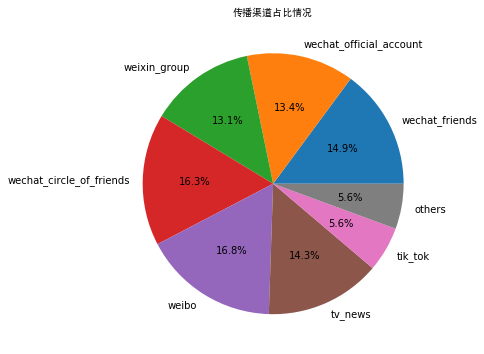

In [91]:
channel_keys2 = ['wechat_friends',
                 'wechat_official_account',
                 'weixin_group',
                 'wechat_circle_of_friends',
                 'weibo',
                 'tv_news',
                 'tik_tok',
                 'others']
plt.figure(figsize=(10,6))
plt.pie(channel_values,labels=channel_keys2,autopct='%1.1f%%')
plt.title("传播渠道占比情况",fontproperties=myfont)
plt.show()

- 1 微信好友－公众号－微信群－微信朋友圈，腾讯的微信渠道占据了49%份额，抽样人群一半比例看微信
- 2 微博份额、朋友圈，传播渠道份额一致，占据16％份额
- 3 电视新闻渠道份额约等于朋友圈，占据14%，朋友圈可信度　vs 电视新闻可信度　应该没有相关性
- 4.1 抖音用来刷肺炎新闻只占据6%份额，传播新闻力度上偏小
- 4.2 抖音从娱乐本身角度来说，报喜不报忧，信息传播复杂度较差，继而推荐算法视频谣言及评论置顶也无传播谣言的可能

In [92]:
df.head(2)

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
0,2020-01-26 11:59:57,480,18~25,男,大学本科,大学生,湖北省宜昌市,病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，公众号，微信群，微信朋友圈，微博，电视新闻,中立，不做判断,已有权威机构证实存在短缺,口罩，酒精，体温计,已储备30天以上的物资
1,2020-01-26 03:48:37,203,26~30,女,高中/中专/技校,个体经营户,福建省莆田市,病毒会进化，并且致死性越来越强，病毒对老年人有严重的威胁，感染病毒后会立即出现咳嗽、发烧的症...,有中型聚会安排（5～10人）,父母已取消所有聚会安排,微信好友，公众号，微信群，微博，微信朋友圈，抖音，电视新闻,中立，不做判断,没有确凿信息，不断定,口罩，体温计，酒精,未储备


In [94]:
df.my_party.value_counts()

已取消所有聚会安排         350
有中型聚会安排（5～10人）     73
有小型聚会安排（5人以下）      44
有大型聚会安排（11及以上）     31
Name: my_party, dtype: int64

In [95]:
df.age.value_counts()

18~25    283
26~30    125
31~40     55
41~50     16
18岁以下     11
51~60      7
60以上       1
Name: age, dtype: int64

In [96]:
df.sex.value_counts()

女       300
男       178
不想透露     20
Name: sex, dtype: int64

In [102]:
df_girl = df[df.sex == '女']
df_girl

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
1,2020-01-26 03:48:37,203,26~30,女,高中/中专/技校,个体经营户,福建省莆田市,病毒会进化，并且致死性越来越强，病毒对老年人有严重的威胁，感染病毒后会立即出现咳嗽、发烧的症...,有中型聚会安排（5～10人）,父母已取消所有聚会安排,微信好友，公众号，微信群，微博，微信朋友圈，抖音，电视新闻,中立，不做判断,没有确凿信息，不断定,口罩，体温计，酒精,未储备
2,2020-01-26 12:47:10,495,26~30,女,硕士及以上,媒体工作者,浙江省温州市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信群，公众号，微信好友，微信朋友圈，微博,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩，酒精,已储备7～30天的物资
3,2020-01-26 05:16:23,216,31~40,女,大学本科,上班族/创业者,湖南省长沙市,没有生病的人，不会传染病毒，病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒,有中型聚会安排（5～10人）,有聚会安排，父母会参与,公众号，微信群，微信朋友圈，微博，抖音，电视新闻，微信好友,中立，不做判断,没有确凿信息，不断定,口罩,已储备7～30天的物资
4,2020-01-26 10:29:37,411,18~25,女,大学本科,大学生,湖北省黄冈市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒致死性很强，病毒会进化，并且致死性...,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，公众号，微信群，微信朋友圈，微博，抖音，电视新闻，其他,较悲观，短期可能会更严重,已有权威机构证实存在短缺,口罩，酒精,未储备
7,2020-01-26 08:14:38,262,26~30,女,硕士及以上,上班族/创业者,湖北省襄阳市,75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,公众号，微信朋友圈，微博,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩，酒精，体温计,已储备7～30天的物资
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2020-01-26 00:12:43,135,18~25,女,大学本科,大学生,重庆市重庆市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒,有中型聚会安排（5～10人）,父母已取消所有聚会安排,微博，电视新闻，微信好友，微信朋友圈,中立，不做判断,没有确凿信息，不断定,酒精，口罩,未储备
490,2020-01-26 00:19:38,141,18~25,女,大学本科,上班族/创业者,四川省绵阳市,感染病毒后会立即出现咳嗽、发烧的症状，病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越...,已取消所有聚会安排,父母已取消所有聚会安排,微博，电视新闻，微信好友，公众号,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩,未储备
492,2020-01-25 23:21:57,29,26~30,女,大学本科,上班族/创业者,广东省珠海市,75%浓度酒精可以杀死病毒,已取消所有聚会安排,父母已取消所有聚会安排,微信群，微信朋友圈，微博,较乐观，短期会好转,没有任何物资短缺信息,口罩,已储备7天内的物资
493,2020-01-26 01:21:13,173,18~25,女,大学本科,大学生,江西省赣州市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强,已取消所有聚会安排,有聚会安排，父母会参与,公众号，微信朋友圈，微博，电视新闻，微信好友,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩,已储备7天内的物资


In [103]:
df_girl.age.value_counts()

18~25    179
26~30     65
31~40     34
41~50     10
18岁以下      8
51~60      3
60以上       1
Name: age, dtype: int64

In [118]:
df_girl_age_1825 = df_girl[df_girl.age == '18~25']
df_girl_age_1825

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
4,2020-01-26 10:29:37,411,18~25,女,大学本科,大学生,湖北省黄冈市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒致死性很强，病毒会进化，并且致死性...,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，公众号，微信群，微信朋友圈，微博，抖音，电视新闻，其他,较悲观，短期可能会更严重,已有权威机构证实存在短缺,口罩，酒精,未储备
8,2020-01-26 08:27:00,270,18~25,女,大学本科,上班族/创业者,四川省绵阳市,75%浓度酒精可以杀死病毒，病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，微信群，微信朋友圈，微博,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩，酒精,已储备7天内的物资
23,2020-01-26 10:24:30,405,18~25,女,大学专科,上班族/创业者,湖北省黄冈市,感染病毒后会立即出现咳嗽、发烧的症状，病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，...,已取消所有聚会安排,父母已取消所有聚会安排,微博，微信好友，微信朋友圈，电视新闻,较悲观，短期可能会更严重,已有权威机构证实存在短缺,口罩，酒精,已储备7～30天的物资
24,2020-01-26 09:31:50,344,18~25,女,硕士及以上,大学生,辽宁省沈阳市,没有生病的人，不会传染病毒，病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化...,有小型聚会安排（5人以下）,有聚会安排，父母会参与,公众号，微信群，微信朋友圈，微博,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩，护目镜，体温计，抗生素，抗病毒药物,已储备7天内的物资
30,2020-01-26 08:31:59,276,18~25,女,硕士及以上,大学生,湖北省荆州市,感染病毒后会立即出现咳嗽、发烧的症状，病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越...,已取消所有聚会安排,父母已取消所有聚会安排,微信朋友圈，微信群，其他,中立，不做判断,没有确凿信息，不断定,口罩,未储备
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2020-01-25 23:18:30,17,18~25,女,大学专科,上班族/创业者,湖北省襄阳市,没有生病的人，不会传染病毒，感染病毒后会立即出现咳嗽、发烧的症状，75%浓度酒精可以杀死病毒...,已取消所有聚会安排,父母已取消所有聚会安排,微博,较悲观，短期可能会更严重,已有权威机构证实存在短缺,口罩，酒精，体温计,已储备7～30天的物资
489,2020-01-26 00:12:43,135,18~25,女,大学本科,大学生,重庆市重庆市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒,有中型聚会安排（5～10人）,父母已取消所有聚会安排,微博，电视新闻，微信好友，微信朋友圈,中立，不做判断,没有确凿信息，不断定,酒精，口罩,未储备
490,2020-01-26 00:19:38,141,18~25,女,大学本科,上班族/创业者,四川省绵阳市,感染病毒后会立即出现咳嗽、发烧的症状，病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越...,已取消所有聚会安排,父母已取消所有聚会安排,微博，电视新闻，微信好友，公众号,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩,未储备
493,2020-01-26 01:21:13,173,18~25,女,大学本科,大学生,江西省赣州市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强,已取消所有聚会安排,有聚会安排，父母会参与,公众号，微信朋友圈，微博，电视新闻，微信好友,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩,已储备7天内的物资


In [119]:
df_girl_age_2630 = df_girl[df_girl.age == '26~30']
df_girl_age_2630

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
1,2020-01-26 03:48:37,203,26~30,女,高中/中专/技校,个体经营户,福建省莆田市,病毒会进化，并且致死性越来越强，病毒对老年人有严重的威胁，感染病毒后会立即出现咳嗽、发烧的症...,有中型聚会安排（5～10人）,父母已取消所有聚会安排,微信好友，公众号，微信群，微博，微信朋友圈，抖音，电视新闻,中立，不做判断,没有确凿信息，不断定,口罩，体温计，酒精,未储备
2,2020-01-26 12:47:10,495,26~30,女,硕士及以上,媒体工作者,浙江省温州市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信群，公众号，微信好友，微信朋友圈，微博,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩，酒精,已储备7～30天的物资
7,2020-01-26 08:14:38,262,26~30,女,硕士及以上,上班族/创业者,湖北省襄阳市,75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,公众号，微信朋友圈，微博,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩，酒精，体温计,已储备7～30天的物资
10,2020-01-26 09:06:12,300,26~30,女,高中/中专/技校,上班族/创业者,山西省临汾市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，公众号，微信群，微博，微信朋友圈，抖音，电视新闻,中立，不做判断,没有确凿信息，不断定,口罩，酒精，体温计,已储备7～30天的物资
12,2020-01-26 12:34:08,493,26~30,女,硕士及以上,上班族/创业者,浙江省温州市,没有生病的人，不会传染病毒，病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化...,有中型聚会安排（5～10人）,父母已取消所有聚会安排,公众号，微信朋友圈,较乐观，短期会好转,没有确凿信息，不断定,口罩，体温计，抗生素，抗病毒药物，酒精,已储备7天内的物资
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,2020-01-26 00:41:50,152,26~30,女,大学本科,上班族/创业者,湖南省长沙市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微博，电视新闻，微信群,中立，不做判断,没有确凿信息，不断定,口罩，抗病毒药物,已储备7～30天的物资
476,2020-01-26 03:11:12,196,26~30,女,大学本科,上班族/创业者,湖南省长沙市,感染病毒后会立即出现咳嗽、发烧的症状，病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，...,有小型聚会安排（5人以下）,父母已取消所有聚会安排,微博，微信朋友圈,中立，不做判断,没有确凿信息，不断定,口罩，酒精，抗生素，保健品，体温计,未储备
483,2020-01-25 23:55:18,113,26~30,女,大学本科,上班族/创业者,广东省广州市,感染病毒后会立即出现咳嗽、发烧的症状，病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，...,有大型聚会安排（11及以上）,有聚会安排，父母会参与,公众号，电视新闻，微信朋友圈,中立，不做判断,没有确凿信息，不断定,口罩，酒精，体温计,已储备7天内的物资
487,2020-01-26 00:40:13,150,26~30,女,大学本科,上班族/创业者,广西壮族自治区北海市,病毒会进化，并且致死性越来越强，75%浓度酒精可以杀死病毒,已取消所有聚会安排,不清楚,微信好友，公众号，微博，抖音，电视新闻，微信朋友圈,中立，不做判断,没有确凿信息，不断定,口罩,未储备


In [121]:
df_girl_younpeople = df_girl_age_1825.append(df_girl_age_2630)
df_girl_younpeople

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
4,2020-01-26 10:29:37,411,18~25,女,大学本科,大学生,湖北省黄冈市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒致死性很强，病毒会进化，并且致死性...,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，公众号，微信群，微信朋友圈，微博，抖音，电视新闻，其他,较悲观，短期可能会更严重,已有权威机构证实存在短缺,口罩，酒精,未储备
8,2020-01-26 08:27:00,270,18~25,女,大学本科,上班族/创业者,四川省绵阳市,75%浓度酒精可以杀死病毒，病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，微信群，微信朋友圈，微博,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩，酒精,已储备7天内的物资
23,2020-01-26 10:24:30,405,18~25,女,大学专科,上班族/创业者,湖北省黄冈市,感染病毒后会立即出现咳嗽、发烧的症状，病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，...,已取消所有聚会安排,父母已取消所有聚会安排,微博，微信好友，微信朋友圈，电视新闻,较悲观，短期可能会更严重,已有权威机构证实存在短缺,口罩，酒精,已储备7～30天的物资
24,2020-01-26 09:31:50,344,18~25,女,硕士及以上,大学生,辽宁省沈阳市,没有生病的人，不会传染病毒，病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化...,有小型聚会安排（5人以下）,有聚会安排，父母会参与,公众号，微信群，微信朋友圈，微博,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩，护目镜，体温计，抗生素，抗病毒药物,已储备7天内的物资
30,2020-01-26 08:31:59,276,18~25,女,硕士及以上,大学生,湖北省荆州市,感染病毒后会立即出现咳嗽、发烧的症状，病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越...,已取消所有聚会安排,父母已取消所有聚会安排,微信朋友圈，微信群，其他,中立，不做判断,没有确凿信息，不断定,口罩,未储备
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,2020-01-26 00:41:50,152,26~30,女,大学本科,上班族/创业者,湖南省长沙市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微博，电视新闻，微信群,中立，不做判断,没有确凿信息，不断定,口罩，抗病毒药物,已储备7～30天的物资
476,2020-01-26 03:11:12,196,26~30,女,大学本科,上班族/创业者,湖南省长沙市,感染病毒后会立即出现咳嗽、发烧的症状，病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，...,有小型聚会安排（5人以下）,父母已取消所有聚会安排,微博，微信朋友圈,中立，不做判断,没有确凿信息，不断定,口罩，酒精，抗生素，保健品，体温计,未储备
483,2020-01-25 23:55:18,113,26~30,女,大学本科,上班族/创业者,广东省广州市,感染病毒后会立即出现咳嗽、发烧的症状，病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，...,有大型聚会安排（11及以上）,有聚会安排，父母会参与,公众号，电视新闻，微信朋友圈,中立，不做判断,没有确凿信息，不断定,口罩，酒精，体温计,已储备7天内的物资
487,2020-01-26 00:40:13,150,26~30,女,大学本科,上班族/创业者,广西壮族自治区北海市,病毒会进化，并且致死性越来越强，75%浓度酒精可以杀死病毒,已取消所有聚会安排,不清楚,微信好友，公众号，微博，抖音，电视新闻，微信朋友圈,中立，不做判断,没有确凿信息，不断定,口罩,未储备


In [123]:
df_girl_age_little_18 = df_girl[df_girl.age == '18岁以下']
df_girl_age_little_18

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
50,2020-01-26 10:56:44,446,18岁以下,女,高中/中专/技校,其他,北京市北京市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强,有小型聚会安排（5人以下）,父母已取消所有聚会安排,微博，电视新闻,中立，不做判断,没有任何物资短缺信息,口罩，酒精，体温计,已储备30天以上的物资
116,2020-01-26 07:12:56,231,18岁以下,女,保密,其他,上海市上海市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒,有小型聚会安排（5人以下）,父母已取消所有聚会安排,微博,较乐观，短期会好转,没有确凿信息，不断定,口罩,已储备7天内的物资
156,2020-01-26 11:31:57,467,18岁以下,女,大学本科,大学生,湖南省娄底市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强,有中型聚会安排（5～10人）,有聚会安排，父母会参与,微信好友，公众号，微信群，微信朋友圈，其他,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩，酒精，体温计，抗生素，抗病毒药物,未储备
239,2020-01-26 12:31:14,492,18岁以下,女,初中及以下,大学生,广东省阳江市,病毒对老年人有严重的威胁，病毒对幼儿几乎无威胁，病毒致死性很强,已取消所有聚会安排,父母已取消所有聚会安排,电视新闻，微博，微信群，微信好友，其他,中立，不做判断,没有确凿信息，不断定,抗病毒药物,已储备7天内的物资
253,2020-01-26 11:27:48,466,18岁以下,女,高中/中专/技校,其他,重庆市重庆市,病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，公众号，微信群，微信朋友圈，微博，抖音，电视新闻，其他,较悲观，短期可能会更严重,没有确凿信息，不断定,酒精,已储备7天内的物资
379,2020-01-26 00:03:24,123,18岁以下,女,大学本科,媒体工作者,北京市北京市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，微信朋友圈，微博,较悲观，短期可能会更严重,没有任何物资短缺信息,口罩,未储备
392,2020-01-25 23:56:25,114,18岁以下,女,保密,其他,广东省东莞市,病毒对幼儿几乎无威胁，病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强,有中型聚会安排（5～10人）,有聚会安排，父母会参与,微信好友，微信朋友圈，微博，电视新闻，其他,中立，不做判断,没有确凿信息，不断定,体温计,已储备7天内的物资
437,2020-01-26 01:23:37,175,18岁以下,女,高中/中专/技校,其他,广东省佛山市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒,已取消所有聚会安排,有聚会安排，父母会参与,微信好友，公众号，微博，电视新闻，其他,较乐观，短期会好转,没有确凿信息，不断定,口罩，体温计，抗生素,已储备7天内的物资


In [124]:
df_girl_younpeople = df_girl_younpeople.append(df_girl_age_little_18)
df_girl_younpeople

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
4,2020-01-26 10:29:37,411,18~25,女,大学本科,大学生,湖北省黄冈市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒致死性很强，病毒会进化，并且致死性...,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，公众号，微信群，微信朋友圈，微博，抖音，电视新闻，其他,较悲观，短期可能会更严重,已有权威机构证实存在短缺,口罩，酒精,未储备
8,2020-01-26 08:27:00,270,18~25,女,大学本科,上班族/创业者,四川省绵阳市,75%浓度酒精可以杀死病毒，病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，微信群，微信朋友圈，微博,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩，酒精,已储备7天内的物资
23,2020-01-26 10:24:30,405,18~25,女,大学专科,上班族/创业者,湖北省黄冈市,感染病毒后会立即出现咳嗽、发烧的症状，病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，...,已取消所有聚会安排,父母已取消所有聚会安排,微博，微信好友，微信朋友圈，电视新闻,较悲观，短期可能会更严重,已有权威机构证实存在短缺,口罩，酒精,已储备7～30天的物资
24,2020-01-26 09:31:50,344,18~25,女,硕士及以上,大学生,辽宁省沈阳市,没有生病的人，不会传染病毒，病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化...,有小型聚会安排（5人以下）,有聚会安排，父母会参与,公众号，微信群，微信朋友圈，微博,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩，护目镜，体温计，抗生素，抗病毒药物,已储备7天内的物资
30,2020-01-26 08:31:59,276,18~25,女,硕士及以上,大学生,湖北省荆州市,感染病毒后会立即出现咳嗽、发烧的症状，病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越...,已取消所有聚会安排,父母已取消所有聚会安排,微信朋友圈，微信群，其他,中立，不做判断,没有确凿信息，不断定,口罩,未储备
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2020-01-26 12:31:14,492,18岁以下,女,初中及以下,大学生,广东省阳江市,病毒对老年人有严重的威胁，病毒对幼儿几乎无威胁，病毒致死性很强,已取消所有聚会安排,父母已取消所有聚会安排,电视新闻，微博，微信群，微信好友，其他,中立，不做判断,没有确凿信息，不断定,抗病毒药物,已储备7天内的物资
253,2020-01-26 11:27:48,466,18岁以下,女,高中/中专/技校,其他,重庆市重庆市,病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，公众号，微信群，微信朋友圈，微博，抖音，电视新闻，其他,较悲观，短期可能会更严重,没有确凿信息，不断定,酒精,已储备7天内的物资
379,2020-01-26 00:03:24,123,18岁以下,女,大学本科,媒体工作者,北京市北京市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，微信朋友圈，微博,较悲观，短期可能会更严重,没有任何物资短缺信息,口罩,未储备
392,2020-01-25 23:56:25,114,18岁以下,女,保密,其他,广东省东莞市,病毒对幼儿几乎无威胁，病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强,有中型聚会安排（5～10人）,有聚会安排，父母会参与,微信好友，微信朋友圈，微博，电视新闻，其他,中立，不做判断,没有确凿信息，不断定,体温计,已储备7天内的物资


In [126]:
df_girl_younpeople.education.value_counts()

大学本科        150
硕士及以上        57
大学专科         25
高中/中专/技校     12
初中及以下         4
保密            4
Name: education, dtype: int64

In [128]:
labels_woman2 = df[df.sex == '女']['age'].value_counts().index
labels_woman2

Index(['18~25', '26~30', '31~40', '41~50', '18岁以下', '51~60', '60以上'], dtype='object')

In [132]:
age_woman2 = df[df.sex == '女']['age'].value_counts().values
age_woman2

array([179,  65,  34,  10,   8,   3,   1])

In [130]:
labels_man2 = df[df.sex == '男']['age'].value_counts().index
labels_man2

Index(['18~25', '26~30', '31~40', '41~50', '51~60', '18岁以下'], dtype='object')

In [131]:
age_man2 = df[df.sex == '男']['age'].value_counts().values
age_man2

array([93, 54, 20,  5,  4,  2])

In [133]:
df_boy = df[df.sex == '男']
df_boy_age_1825 = df_boy[df_boy.age == '18~25']
df_boy_age_2630 = df_boy[df_boy.age == '26~30']
df_boy_age_little18 = df_boy[df_boy.age == '18岁以下']
df_boy_younpeople = df_boy_age_1825.append(df_boy_age_2630)
df_boy_younpeople = df_boy_younpeople.append(df_boy_age_little18)
df_boy_younpeople.education.value_counts()

大学本科        81
硕士及以上       39
大学专科        18
高中/中专/技校     6
保密           5
Name: education, dtype: int64

In [134]:
df_girl_younpeople.education.value_counts()

大学本科        150
硕士及以上        57
大学专科         25
高中/中专/技校     12
初中及以下         4
保密            4
Name: education, dtype: int64

In [140]:
print(df_girl_younpeople.shape)
print(df_boy_younpeople.shape)

(252, 15)
(149, 15)


In [141]:
df_girl_younpeople.head(2)

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
4,2020-01-26 10:29:37,411,18~25,女,大学本科,大学生,湖北省黄冈市,病毒对老年人有严重的威胁，75%浓度酒精可以杀死病毒，病毒致死性很强，病毒会进化，并且致死性...,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，公众号，微信群，微信朋友圈，微博，抖音，电视新闻，其他,较悲观，短期可能会更严重,已有权威机构证实存在短缺,口罩，酒精,未储备
8,2020-01-26 08:27:00,270,18~25,女,大学本科,上班族/创业者,四川省绵阳市,75%浓度酒精可以杀死病毒，病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，微信群，微信朋友圈，微博,较悲观，短期可能会更严重,没有确凿信息，不断定,口罩，酒精,已储备7天内的物资


In [142]:
df_boy_girl_younpeople = df_boy_younpeople.append(df_girl_younpeople)
df_boy_girl_younpeople.shape

(401, 15)

In [143]:
df_boy_girl_younpeople.parent_party.value_counts()

父母已取消所有聚会安排    285
有聚会安排，父母会参与     86
不清楚             30
Name: parent_party, dtype: int64

In [144]:
df_boy_girl_younpeople.my_party.value_counts()

已取消所有聚会安排         270
有中型聚会安排（5～10人）     65
有小型聚会安排（5人以下）      39
有大型聚会安排（11及以上）     27
Name: my_party, dtype: int64

In [149]:
young_myparty_keys = list(df_boy_girl_younpeople.my_party.value_counts().index)
young_myparty_keys

['已取消所有聚会安排', '有中型聚会安排（5～10人）', '有小型聚会安排（5人以下）', '有大型聚会安排（11及以上）']

In [150]:
young_myparty_values = list(df_boy_girl_younpeople.my_party.value_counts().values)
young_myparty_values

[270, 65, 39, 27]

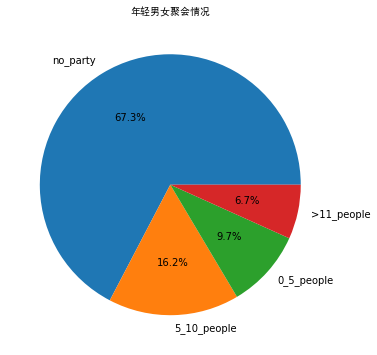

In [152]:
young_myparty_keys2 = ['no_party','5_10_people','0_5_people','>11_people']
plt.figure(figsize=(10,6))
plt.pie(young_myparty_values,labels=young_myparty_keys2,autopct='%1.1f%%')
plt.title("年轻男女聚会情况",fontproperties=myfont)
plt.show()

In [153]:
young_parentsparty_keys = list(df_boy_girl_younpeople.parent_party.value_counts().index)
young_parentsparty_keys

['父母已取消所有聚会安排', '有聚会安排，父母会参与', '不清楚']

In [154]:
young_parentsparty_values = list(df_boy_girl_younpeople.parent_party.value_counts().values)
young_parentsparty_values

[285, 86, 30]

In [157]:
young_parentsparty_keys2 = ['parents_no_party','parents_yes_party','do_not_know']

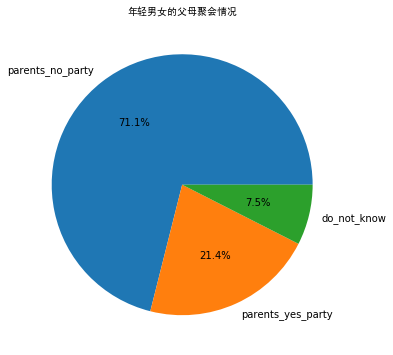

In [158]:
plt.figure(figsize=(10,6))
plt.pie(young_parentsparty_values,labels=young_parentsparty_keys2,autopct='%1.1f%%')
plt.title("年轻男女的父母聚会情况",fontproperties=myfont)
plt.show()

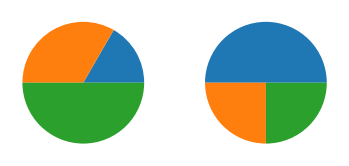

In [159]:
# 121 > 1行2列第1个
fig1 = plt.subplot(121)
plt.pie([1,2,3])
# 122 > 1行2列第2个
fig2 = plt.subplot(122)
plt.pie([10,5,5])
plt.show()

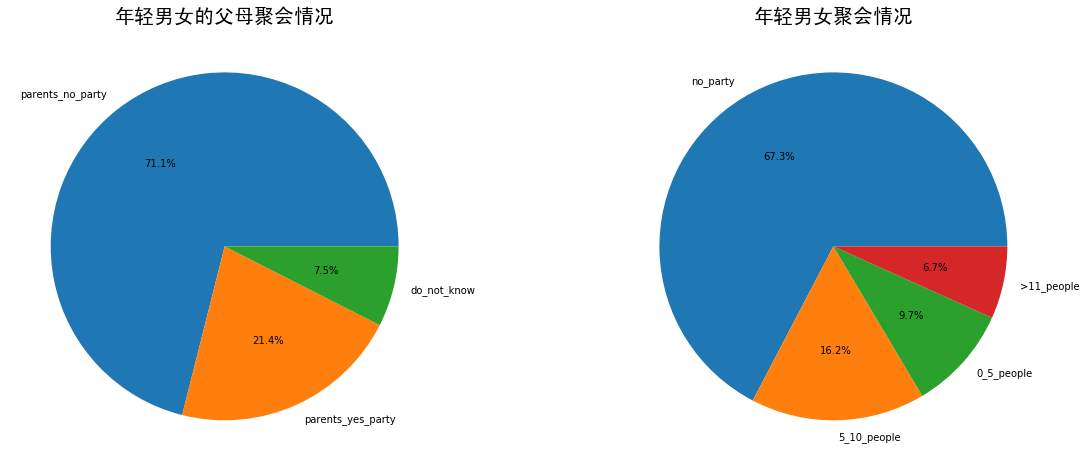

In [164]:
plt.figure(figsize=(20,8))
fig1 = plt.subplot(121)
plt.pie(young_parentsparty_values,labels=young_parentsparty_keys2,autopct='%1.1f%%')
plt.title("年轻男女的父母聚会情况",fontproperties=myfont,fontsize=20)
fig2 = plt.subplot(122)
plt.pie(young_myparty_values,labels=young_myparty_keys2,autopct='%1.1f%%')
plt.title("年轻男女聚会情况",fontproperties=myfont,fontsize=20)
plt.show()
# 明知山有虎偏向虎山行，年轻人和年轻人的父母还是会选择聚会的情况差不多
# 并不是读过书的人就一定真的懂得拒绝聚会带来的可能性肺炎影响

In [165]:
df.head(2)

,time,id,age,sex,education,job,location,correct_understanding,my_party,parent_party,channel_find_info,control_feelings,hospital_resource_shortage,family_medical_resources,family_living_resources
0,2020-01-26 11:59:57,480,18~25,男,大学本科,大学生,湖北省宜昌市,病毒对老年人有严重的威胁，病毒会进化，并且致死性越来越强,已取消所有聚会安排,父母已取消所有聚会安排,微信好友，公众号，微信群，微信朋友圈，微博，电视新闻,中立，不做判断,已有权威机构证实存在短缺,口罩，酒精，体温计,已储备30天以上的物资
1,2020-01-26 03:48:37,203,26~30,女,高中/中专/技校,个体经营户,福建省莆田市,病毒会进化，并且致死性越来越强，病毒对老年人有严重的威胁，感染病毒后会立即出现咳嗽、发烧的症...,有中型聚会安排（5～10人）,父母已取消所有聚会安排,微信好友，公众号，微信群，微博，微信朋友圈，抖音，电视新闻,中立，不做判断,没有确凿信息，不断定,口罩，体温计，酒精,未储备


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 15 columns):
time                          498 non-null object
id                            498 non-null int64
age                           498 non-null object
sex                           498 non-null object
education                     498 non-null object
job                           498 non-null object
location                      498 non-null object
correct_understanding         498 non-null object
my_party                      498 non-null object
parent_party                  498 non-null object
channel_find_info             498 non-null object
control_feelings              498 non-null object
hospital_resource_shortage    498 non-null object
family_medical_resources      498 non-null object
family_living_resources       498 non-null object
dtypes: int64(1), object(14)
memory usage: 58.5+ KB
